In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [79]:
data = np.genfromtxt('scan_data.txt', delimiter=' ', skip_header=1)
data = data[:, :-1]
print(data.shape)

(18814, 6)


In [80]:
from zeisscmm import transform_points

In [81]:
coord_diff = np.genfromtxt('test_program/mag_test_mcs.txt', delimiter=' ')
R = coord_diff[:9].reshape((3,3))
T = coord_diff[9:]

In [82]:
data_pcs = transform_points(data[:, :3], T, R, inverse=True)
print(data_pcs.shape)

(18814, 3)


In [83]:
data[:, :3] = data_pcs

In [84]:
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
Bx = data[:, 3]
By = data[:, 4]
Bz = data[:, 5]

In [85]:
B_norm = np.linalg.norm(np.array((Bx, By, Bz)).T, axis=1)

In [86]:
Bx_norm = Bx/B_norm
By_norm = By/B_norm
Bz_norm = Bz/B_norm

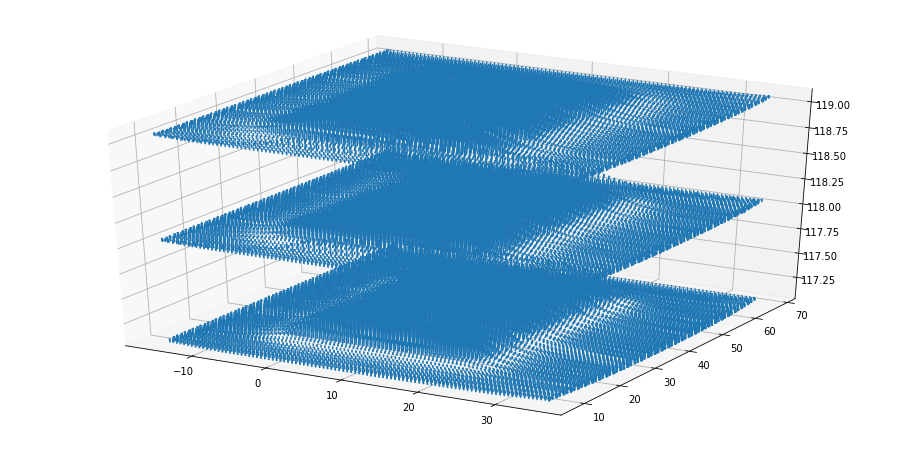

In [91]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
q = ax.quiver(x, y, z, Bx_norm, By_norm, Bz_norm, length=0.2)

plt.show()